In [31]:
from skimage.feature import hog
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [32]:
# Function to extract HOG features from an image
def extract_hog_features(img):
    resized_img = cv2.resize(img, (64, 128))
    resized_img = cv2.convertScaleAbs(resized_img)  # Convert to 8-bit unsigned integer
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_RGB2GRAY)
    fd = hog(gray_img, feature_vector=True)
    return fd

In [33]:
# Function to preprocess the image data
def preprocess_image(img):
    normalized_img = img.astype(float) / 255.0  # Normalize image
    return normalized_img

Image shape: (260, 260, 3)


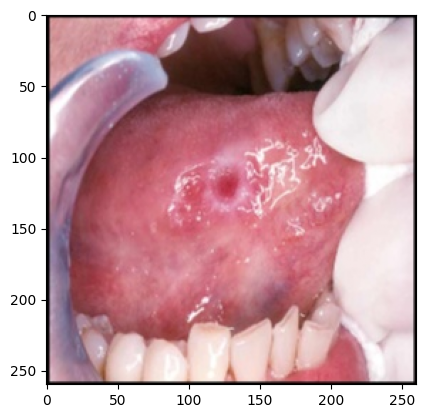

In [34]:
# Load and preprocess the test image
img_path = r'D:\\oral cancer project\\test&train\\cancer\\img_cancer_22.jpg'
img = mpimg.imread(img_path)
preprocessed_img = preprocess_image(img)

print('Image shape:', img.shape)
plt.imshow(preprocessed_img)
plt.show()

In [35]:
# Load and preprocess the training images
train_data = []
train_labels = []

cancer_train_path = 'D:\\oral cancer project\\train\\cancer\\*.jpg'
noncancer_train_path = 'D:\\oral cancer project\\train\\non-cancer\\*.jpg'

for entry in glob.glob(cancer_train_path):
    img = mpimg.imread(entry)
    preprocessed_img = preprocess_image(img)
    fd = extract_hog_features(preprocessed_img)
    train_data.append(fd)
    train_labels.append('cancer')

for entry in glob.glob(noncancer_train_path):
    img = mpimg.imread(entry)
    preprocessed_img = preprocess_image(img)
    fd = extract_hog_features(preprocessed_img)
    train_data.append(fd)
    train_labels.append('non-cancer')

In [36]:
# Combine train data and labels
train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [37]:
# Split the data into train and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)


In [38]:
# Normalize the data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
val_data = scaler.transform(val_data)

In [39]:
# Apply dimensionality reduction using PCA
n_components = min(train_data.shape[0], train_data.shape[1])  # Set n_components to the minimum between samples and features
pca = PCA(n_components=n_components)
train_data = pca.fit_transform(train_data)
val_data = pca.transform(val_data)


In [40]:
# Load and preprocess the test images
test_data = []
test_labels = []

cancer_test_path = 'D:\\oral cancer project\\test\\cancer\\*.jpg'
noncancer_test_path = 'D:\\oral cancer project\\test\\non-cancer\\*.jpg'

for entry in glob.glob(cancer_test_path):
    img = mpimg.imread(entry)
    preprocessed_img = preprocess_image(img)
    fd = extract_hog_features(preprocessed_img)
    test_data.append(fd)
    test_labels.append('cancer')

for entry in glob.glob(noncancer_test_path):
    img = mpimg.imread(entry)
    preprocessed_img = preprocess_image(img)
    fd = extract_hog_features(preprocessed_img)
    test_data.append(fd)
    test_labels.append('non-cancer')

In [41]:
# Combine test data and labels
test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [42]:
# Normalize and apply dimensionality reduction to the test data
test_data = scaler.transform(test_data)
test_data = pca.transform(test_data)

In [48]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

# Train the KNN classifier
k_values = range(1, 8)
accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []
loss_scores = []
confusion_matrices = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(train_data, train_labels)

    # Predict on the validation set
    val_pred_labels = knn_classifier.predict(val_data)

    # Calculate accuracy and F1 score on the validation set
    accuracy = accuracy_score(val_labels, val_pred_labels)
    f1 = f1_score(val_labels, val_pred_labels, pos_label='cancer')

    # Calculate evaluation metrics
    precision = precision_score(val_labels, val_pred_labels, pos_label='cancer')
    recall = recall_score(val_labels, val_pred_labels, pos_label='cancer')
    loss = 1 - accuracy

    # Store the metrics
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    f1_scores.append(f1)
    recall_scores.append(recall)
    loss_scores.append(loss)
    confusion_matrices.append(confusion_matrix(val_labels, val_pred_labels))

    # Print the evaluation metrics for each k value
    print('For k =', k)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('F1 Score:', f1)
    print('Recall:', recall)
    print('Loss:', loss)
    print('---------------------------')



For k = 1
Accuracy: 0.6
Precision: 0.75
F1 Score: 0.6666666666666665
Recall: 0.6
Loss: 0.4
---------------------------
For k = 2
Accuracy: 0.7333333333333333
Precision: 0.8
F1 Score: 0.8000000000000002
Recall: 0.8
Loss: 0.2666666666666667
---------------------------
For k = 3
Accuracy: 0.6
Precision: 0.75
F1 Score: 0.6666666666666665
Recall: 0.6
Loss: 0.4
---------------------------
For k = 4
Accuracy: 0.7333333333333333
Precision: 0.7142857142857143
F1 Score: 0.8333333333333333
Recall: 1.0
Loss: 0.2666666666666667
---------------------------
For k = 5
Accuracy: 0.7333333333333333
Precision: 0.7142857142857143
F1 Score: 0.8333333333333333
Recall: 1.0
Loss: 0.2666666666666667
---------------------------
For k = 6
Accuracy: 0.7333333333333333
Precision: 0.7142857142857143
F1 Score: 0.8333333333333333
Recall: 1.0
Loss: 0.2666666666666667
---------------------------
For k = 7
Accuracy: 0.7333333333333333
Precision: 0.7142857142857143
F1 Score: 0.8333333333333333
Recall: 1.0
Loss: 0.2666666

In [44]:
# Print the evaluation metrics for different k values
for k, f1, accuracy, cm in zip(k_values, f1_scores, accuracies, confusion_matrices):
    print('For k =', k, ', F1 score =', f1, ', Accuracy =', accuracy)
    print('Confusion Matrix:\n', cm)


For k = 1 , F1 score = 0.6666666666666665 , Accuracy = 0.6
Confusion Matrix:
 [[6 4]
 [2 3]]
For k = 2 , F1 score = 0.8000000000000002 , Accuracy = 0.7333333333333333
Confusion Matrix:
 [[8 2]
 [2 3]]
For k = 3 , F1 score = 0.6666666666666665 , Accuracy = 0.6
Confusion Matrix:
 [[6 4]
 [2 3]]
For k = 4 , F1 score = 0.8333333333333333 , Accuracy = 0.7333333333333333
Confusion Matrix:
 [[10  0]
 [ 4  1]]
For k = 5 , F1 score = 0.8333333333333333 , Accuracy = 0.7333333333333333
Confusion Matrix:
 [[10  0]
 [ 4  1]]
For k = 6 , F1 score = 0.8333333333333333 , Accuracy = 0.7333333333333333
Confusion Matrix:
 [[10  0]
 [ 4  1]]
For k = 7 , F1 score = 0.8333333333333333 , Accuracy = 0.7333333333333333
Confusion Matrix:
 [[10  0]
 [ 4  1]]


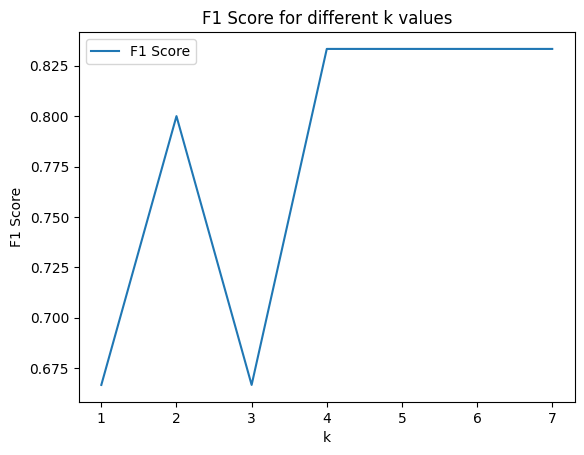

F1 Score:  <function f1_score at 0x000001621310A160>


In [45]:
# Plot F1 scores
plt.plot(k_values, f1_scores, label='F1 Score')
plt.title('F1 Score for different k values')
plt.xlabel('k')
plt.ylabel('F1 Score')
plt.legend()
plt.show()
print('F1 Score: ', f1_score)

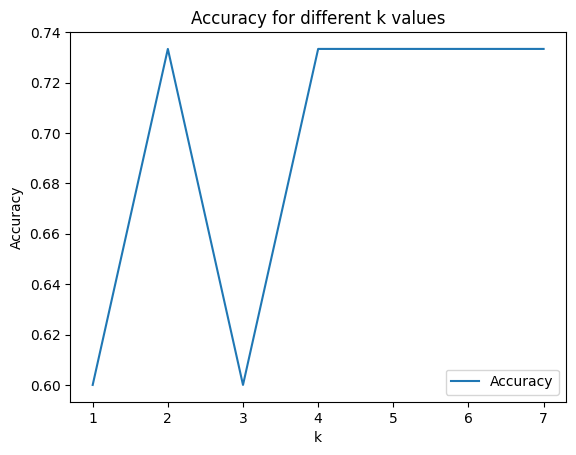

Accuracy: 0.7333333333333333


In [46]:
# Plot accuracies
plt.plot(k_values, accuracies, label='Accuracy')
plt.title('Accuracy for different k values')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('Accuracy:', accuracy)

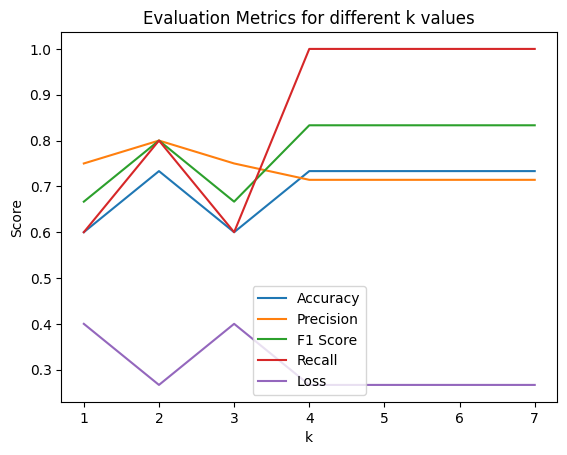

In [47]:
# Plot the evaluation metrics
plt.plot(k_values, accuracy_scores, label='Accuracy')
plt.plot(k_values, precision_scores, label='Precision')
plt.plot(k_values, f1_scores, label='F1 Score')
plt.plot(k_values, recall_scores, label='Recall')
plt.plot(k_values, loss_scores, label='Loss')
plt.title('Evaluation Metrics for different k values')
plt.xlabel('k')
plt.ylabel('Score')
plt.legend()
plt.show()


In [49]:
print('For k =', k)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('F1 Score:', f1)
print('Recall:', recall)
print('Loss:', loss)

For k = 7
Accuracy: 0.7333333333333333
Precision: 0.7142857142857143
F1 Score: 0.8333333333333333
Recall: 1.0
Loss: 0.2666666666666667
